# Hypothesis Testing

In [22]:
import pandas as pd 
import numpy as np 
import os
from scipy import stats
import scipy
import statsmodels.api as sm
from math import sqrt
import matplotlib as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\My PC\Downloads\Cutlets.csv')

In [3]:
data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
data.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
Unit_A = data['Unit A']

In [7]:
Unit_B = data['Unit B']

In [9]:
df = pd.DataFrame(data)

In [10]:
t_value, p_value = sm.stats.ztest(df['Unit A'].dropna(),df['Unit B'].dropna(),alternative='two-sided')
t_value, p_value

(0.7228688704678061, 0.46976045023906077)

##As the P-value(0.46) is significantly high than alpha value(0.05) so there is difference in diameter of the cutlets from unit A and unit B

## LabTat

In [16]:
data = pd.read_csv(r'C:\Users\My PC\Downloads\LabTAT.csv')

In [24]:
data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [18]:
data.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [20]:
df = pd.DataFrame(data)

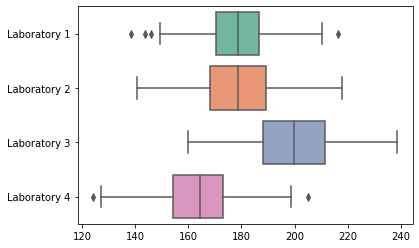

In [23]:
ax = sns.boxplot(data=data, orient='h',palette='Set2')

In [26]:
 stats.f_oneway(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#P-Value is approximately zero so that we can conclude that there is not significant difference in the average turn around time of laboratories.

### Male and female ratio

In [51]:
#Method 1

In [5]:
sales = pd.read_csv(r'C:\Users\My PC\Downloads\BuyerRatio.csv')

In [34]:
sales1=sales.drop(['Observed Values'],axis=1)

In [36]:
sales1

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [6]:
sales.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [30]:
males = pd.Series([50,142,131,70])

In [31]:
males

0     50
1    142
2    131
3     70
dtype: int64

In [9]:
male

array(['Males', 50, 142, 131, 70], dtype=object)

In [27]:
female = pd.Series([435,1523,131,70])

In [28]:
female

0     435
1    1523
2     131
3      70
dtype: int64

In [32]:
stats.ttest_ind(males,female)

Ttest_indResult(statistic=-1.3058894260171554, pvalue=0.23942034522507655)

####As P-Value(0.2394) is more than alpha value(0.05) so we failed to reject null Hypothesis.So the Male Female Buyer Ratio is not same across across every region.

In [52]:
#Method 2

In [53]:
sales1=sales.drop(['Observed Values'],axis=1)

In [54]:
df = pd.DataFrame(data=sales1)

In [55]:
stats.f_oneway(df.iloc[0,:],df.iloc[1,:])

F_onewayResult(statistic=12.841384359570121, pvalue=0.011594334372357063)

#Here pvalue(0.011) is smaller than the alpha value 0.05 
which means alpha value is greater. So Alternative Hypothesis is used.

## Customer Order

In [88]:
df = pd.read_csv(r'C:\Users\My PC\Downloads\Costomer+OrderForm.csv')

In [89]:
df

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [90]:
df.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [92]:
Phillippines_value=df['Phillippines'].value_counts()
Indonesia_value=df['Indonesia'].value_counts()
Malta_value=df['Malta'].value_counts()
India_value=df['India'].value_counts()

In [93]:
Phillippines_value,Indonesia_value,Malta_value,India_value

(Error Free    271
 Defective      29
 Name: Phillippines, dtype: int64,
 Error Free    267
 Defective      33
 Name: Indonesia, dtype: int64,
 Error Free    269
 Defective      31
 Name: Malta, dtype: int64,
 Error Free    280
 Defective      20
 Name: India, dtype: int64)

In [94]:
chistats = stats.chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [95]:
print('T-Test=%f P-Value=%f' % (chistats[0],chistats[1]))

T-Test=3.858961 P-Value=0.277102


###As P-Value(0.27) is greater than alpha(0.05) So that we failed to reject null hypothesis.So the defective % varies by centre.